In [221]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [222]:
url = "/content/train.csv"

In [223]:
train = pd.read_csv(url)

In [224]:
print("The shape of the training data is" ,train.shape)

The shape of the training data is (200000, 77)




---

### 1. `train_size = 0.01` (The Speed Limit)

This tells the computer to use only **1%** of the available data for training.

* **Why?** Your dataset has 200,000 rows. Training complex models on that much data can take a very long time.
* **In practice:** . You are choosing to train on a "mini-sample" of 2,000 rows so you can test your code quickly.

### 2. `cutoff_variance = 0.8` (The Information Filter)

This is the threshold for your **PCA (Principal Component Analysis)**.

* **Meaning:** You want to compress 75 features down to a smaller number. This value says: "Keep adding new simplified features until we have captured **80%** of the patterns (variance) from the original data."
* **Trade-off:** If you set it to 0.95, you keep more detail but have more columns. If you set it to 0.50, you have very few columns but lose too much information.

### 3. `cv = 5` (The Quality Control)

This stands for **Cross-Validation** (specifically 5-fold).

* **How it works:** Instead of testing the model once, the computer splits your 2,000 rows into 5 equal parts. It trains on 4 parts and tests on the 1 part it hasn't seen yet. It repeats this 5 times.
* **Why?** It ensures your model didn't just get "lucky" with a specific set of rows. It gives you a more honest average score.

### 4. `random_state = 42` (The Time Machine)

In Machine Learning, many things are "random" (like how the 2,000 rows are picked or how a Decision Tree branches).

* **The Problem:** Without a fixed number, you would get different results every time you click "Run."
* **The Solution:** By setting it to 42 (or any integer), you "lock" the randomness. If you run this today and I run it tomorrow, we will get the **exact same results**. This is called **Reproducibility**.

### 5. `np.random.seed(random_state)` (The Global Lock)

This applies the `random_state` to the entire **NumPy** library, which is the engine doing the heavy math in the background. It ensures that any random numbers generated by NumPy follow that same "locked" sequence we defined.

---

| Variable | Role | Goal |
| --- | --- | --- |
| **train_size** | Data Slicing | Efficiency/Speed |
| **cutoff_variance** | Compression Bar | Balance between simplicity and detail |
| **cv** | Validation | Reliability of results |
| **random_state** | Seed | Consistency/Repeatability |



In [225]:
train_size = 0.01 #The dataset has 200,000 rows. Training complex models on that much data can take a very long time. so we training a mini sample
cutoff_variance = 0.8 #
cv = 5
random_state = 42
np.random.seed(random_state)

In [226]:
train.sample(n =10 , axis = 0 , replace = False , random_state=random_state)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
119737,119737,0,0,15,0,0,0,0,0,11,...,0,0,1,0,0,0,1,0,0,Class_3
72272,72272,0,0,1,0,0,1,0,0,0,...,0,0,0,0,3,0,0,0,0,Class_6
158154,158154,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_6
65426,65426,6,0,0,0,0,2,0,0,0,...,3,7,2,1,0,0,0,1,1,Class_8
30074,30074,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_1
23677,23677,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
134858,134858,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,Class_9
176418,176418,0,0,0,0,0,14,0,0,0,...,0,0,1,1,1,2,0,0,0,Class_2
132467,132467,0,2,1,3,1,0,0,7,8,...,0,1,0,0,20,18,1,0,1,Class_8
4082,4082,40,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,Class_5


In [227]:
train.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,"200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000",...,"200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000","200,000.00000"
mean,"99,999.50000",0.97271,1.16837,2.21932,2.29673,0.79353,1.43111,1.01069,0.67309,1.94398,...,1.79804,0.50870,1.82730,0.91037,1.60359,1.21921,0.80690,1.28293,2.94021,0.63201
std,"57,735.17126",3.94184,3.99341,6.47657,7.55186,2.93578,5.16275,3.94923,2.23495,3.93133,...,5.05301,1.86733,7.18892,3.83518,4.87768,4.82600,2.45874,4.26142,10.78465,3.92531
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,"49,999.75000",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,"99,999.50000",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,"149,999.25000",1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,2.00000,...,1.00000,0.00000,1.00000,1.00000,2.00000,1.00000,1.00000,1.00000,1.00000,0.00000
max,"199,999.00000",61.00000,51.00000,64.00000,70.00000,38.00000,76.00000,43.00000,30.00000,38.00000,...,54.00000,24.00000,79.00000,55.00000,65.00000,67.00000,30.00000,61.00000,130.00000,52.00000


Knowing this helps us decide if we need to scale the data (which we talked about for PCA).

If a column never changes, it provides zero information. It's like a weather station that always says "Sunny" regardless of the storm outside.



In [228]:
train.nunique().sort_values(ascending = False)[:20]

,0
id,200000
feature_15,105
feature_60,99
feature_59,92
feature_73,91
feature_46,87
feature_28,78
feature_32,77
feature_54,72
feature_61,70


the code below checks the numbe rof total classes in target

In [229]:
target = 'target'
classes = train[target].unique()
classes.sort()
print(classes)

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']


we need labelencoders because the target values are alphabetical

In [230]:
le = LabelEncoder()
y = le.fit_transform(train[target])


In [231]:
x = train.drop(['target' , 'id'] , axis = 1)

In [232]:
x.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
model_lbls = [
    'dt' # decision tree
             #,'nb' # gaussian naive bayes
             ,'rf'   # random forest
             #,'lp'   # linear perceptron
             #,'svc'  # support vector
             #,'knn'  # k nearest neighbours
             #,'adb'  # adaboost


]


models = {
    'dt' : {'name': 'Decision Tree',
            'estimator' : DecisionTreeClassifier(random_state=random_state),
            'param': [{'max_depth' : [*range(1,20)] , 'class_weight' : [None , 'balanced']}]
            },
    'rf' : { 'name' : 'Random Forest' ,
            'estimator' : RandomForestClassifier(random_state=random_state),
            'param' :  [{'max_depth' : [*range(4,30,4)],
                         'n_estimators' : [*range(10,30,5)],
                         'class_weight' : [None, 'balanced']
                    }]
    }
}

In [234]:
pca = PCA()
x_pca = pca.fit_transform(x)

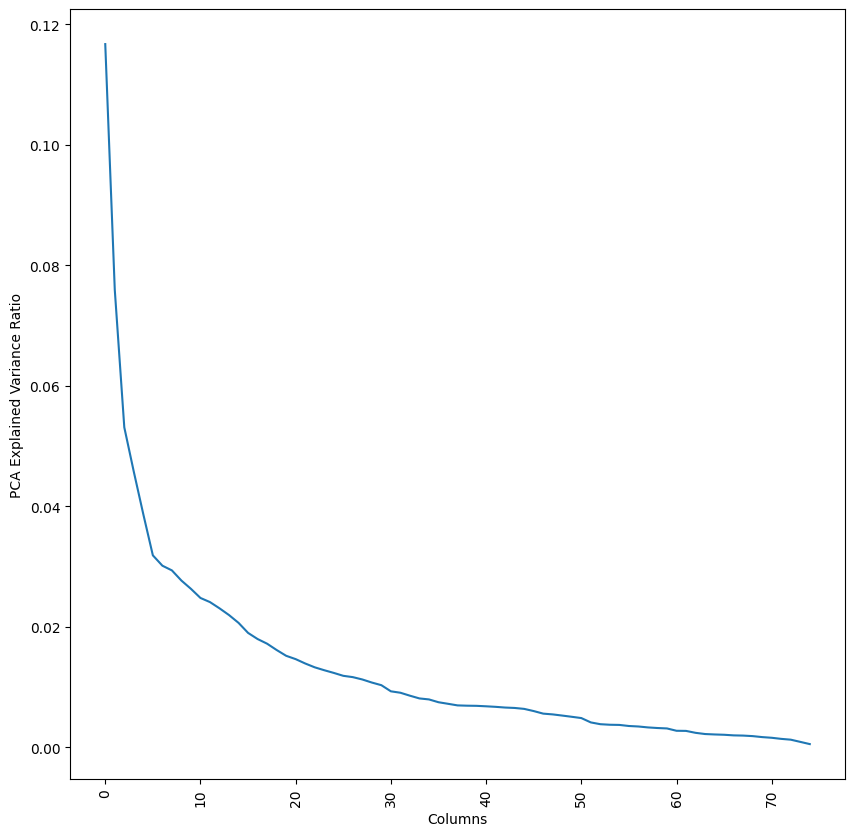

In [235]:
plt.figure(figsize=(10,10))
plt.plot(range(x.shape[1]), pca.explained_variance_ratio_);
plt.xlabel('Columns')
plt.ylabel('PCA Explained Variance Ratio')
plt.xticks(rotation = 90)
plt.show()

The most important thing this graph shows you is where the "important" information ends and the "noise" begins.

The Steep Drop (left side): The first few Principal Components (0 to 10) capture a huge amount of the data's variance (patterns).

The "Long Tail" (right side): After about component 30, the line becomes very flat. This means those components add almost zero new information. They are likely just random noise.

In [236]:
explained_variances = pca.explained_variance_ratio_
sorted_variances = sorted(explained_variances , reverse=True)

Sort components from most important to least important.

Usually explained_variances is already sorted, but this ensures the top components are first.

In [237]:
cumulative_variance = np.cumsum(sorted_variances)

np.cumsum → adds values step by step.

Example: [0.2, 0.15, 0.10] → cumulative → [0.2, 0.35, 0.45].

Purpose: see how much total variance is explained as you add more components.

In [238]:
cutoff_index = np.argmax(cumulative_variance > cutoff_variance)


cutoff_variance = e.g., 0.8 (want to keep 80% of variance)

cumulative_variances > cutoff_variance → finds which components together exceed 80% of total variance

np.argmax → gives the index of the first True value

Result: how many components you need to keep to reach the desired variance threshold.

In [239]:
print("The number of top transformed variables are" , cutoff_index)

The number of top transformed variables are 30


In [240]:
x_final = pca.transform(x)[: , :cutoff_index+1]

[:, :cutoff_index+1]

This is NumPy slicing:

: → means all rows

:cutoff_index+1 → means columns from 0 up to cutoff_index (inclusive)

In [241]:
x_final_train, x_final_test, y_train, y_test = train_test_split(
    x_final, y, train_size = train_size, random_state=random_state)

In [242]:
print("There are {} samples in training dataset".format(x_final_train.shape[0]))
print("There are {} samples in testing dataset".format(x_final_test.shape[0]))
print("Each sample has {} features".format(x_final.shape[1]))

There are 2000 samples in training dataset
There are 198000 samples in testing dataset
Each sample has 31 features


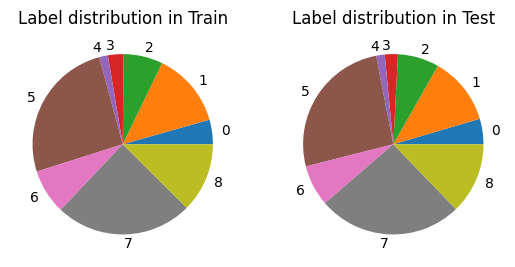

In [243]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.pie(np.unique(y_train, return_counts=True)[1], labels=np.unique(y_train, return_counts=True)[0]);
ax1.set_title("Label distribution in Train")
ax2.pie(np.unique(y_test, return_counts=True)[1], labels=np.unique(y_test, return_counts=True)[0]);
ax2.set_title("Label distribution in Test")
plt.show()

In [250]:
scorings = ['accuracy' , 'f1_macro']

In [251]:

from sklearn.model_selection import ParameterGrid
trials = {}
for lbl in model_lbls:
    params = models[lbl]['param']
    all_combinations = list(ParameterGrid(params))
    trials[lbl] = len(all_combinations)

print(trials)


{'dt': 38, 'rf': 56}


In [252]:
clfs = []
results = pd.DataFrame(columns = ['scoring','model','best_params','accuracy','precision_macro','recall_macro','f1_macro'])

In [254]:
for scoring in scorings:
    for m in model_lbls:
        clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=cv,
                           scoring = scoring,

                           )
        clf.fit(x_final_train, y_train)
        clfs.append(clf)
        y_true, y_pred = y_test, clf.predict(x_final_test)
        # y_preds.append(y_pred)
        cr = classification_report(y_true,y_pred, output_dict=True
                                   , zero_division=1
                                   )
        results.loc[len(results)] = [scoring,models[m]['name'],clf.best_params_
                                    # ,(clf.cv_results_['mean_fit_time'].sum()+clf.cv_results_['mean_score_time'].sum())*n_splits
                                    ,cr['accuracy']
                                    ,cr['macro avg']['precision']
                                    ,cr['macro avg']['recall']
                                    ,cr['macro avg']['f1-score']]

In [255]:
for score in scorings:
    scoring_filter = score
    display(results[results.scoring==scoring_filter]\
                .sort_values(by=scoring_filter,ascending=False)\
                .drop('scoring',axis=1)\
                .style.format(precision=3)\
                .set_caption('Results for scoring "{}"'.format(scoring_filter)))

,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
1,Random Forest,"{'class_weight': None, 'max_depth': 8, 'n_estimators': 25}",0.320,0.264,0.161,0.135
0,Decision Tree,"{'class_weight': None, 'max_depth': 3}",0.307,0.682,0.148,0.126


,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
3,Random Forest,"{'class_weight': 'balanced', 'max_depth': 8, 'n_estimators': 25}",0.261,0.156,0.163,0.157
2,Decision Tree,"{'class_weight': None, 'max_depth': 7}",0.282,0.149,0.148,0.132


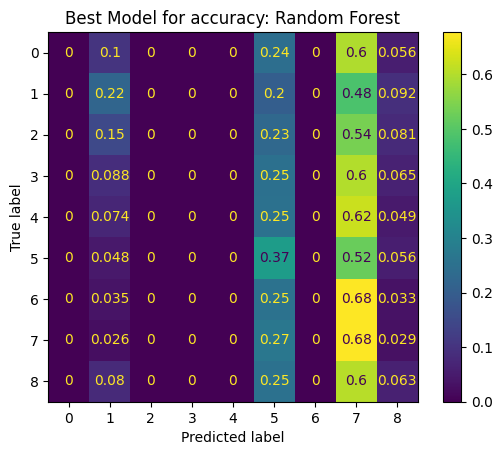

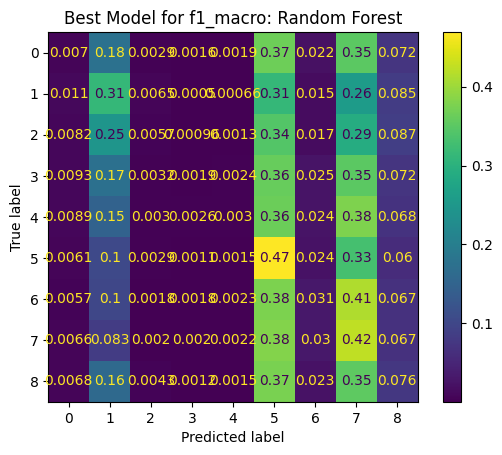

In [256]:
for score in scorings:
    scoring_filter = score
    # bests[score] = results.loc[results.scoring==scoring_filter,scoring_filter].idxmax(axis=0)
    best_row = results.loc[results.scoring==scoring_filter,scoring_filter].idxmax(axis=0)
    disp = ConfusionMatrixDisplay.from_estimator(X=x_final_test, y=y_test, estimator = clfs[best_row], normalize='true')
    # disp.ax_.set_title("Best Model for {}: {}".format(score,results.at[bests[score],'model']))
    disp.ax_.set_title("Best Model for {}: {}".format(score,results.at[best_row,'model']))
plt.show()

In [260]:
results

,scoring,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
0,accuracy,Decision Tree,"{'class_weight': None, 'max_depth': 3}",0.30716,0.68221,0.14838,0.12587
1,accuracy,Random Forest,"{'class_weight': None, 'max_depth': 8, 'n_esti...",0.31988,0.26436,0.16124,0.13507
2,f1_macro,Decision Tree,"{'class_weight': None, 'max_depth': 7}",0.28228,0.14876,0.14778,0.13246
3,f1_macro,Random Forest,"{'class_weight': 'balanced', 'max_depth': 8, '...",0.26059,0.15575,0.16338,0.15682


In [261]:
scoring_filter = 'f1_macro'
best_row = results.loc[results.scoring==scoring_filter,scoring_filter].idxmax(axis=0)
best_row
# best_f1_macro = results.loc[best_row,'model']()

np.int64(3)

In [258]:
test = pd.read_csv('/content/test.csv').drop('id', axis=1)
print("Shape of the test data {}".format(test.shape))

Shape of the test data (100000, 75)


In [259]:
x_f_test = pca.transform(test)[: , :cutoff_index+1]

In [265]:
y = clf.best_estimator_.predict(x_f_test)
y.shape

(100000,)

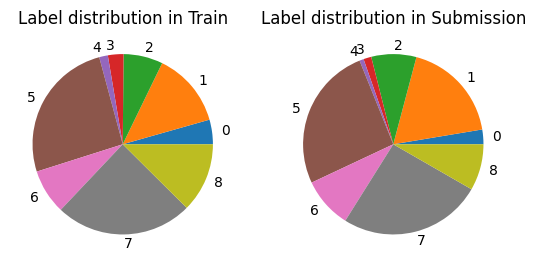

In [266]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.pie(np.unique(y_train, return_counts=True)[1], labels=np.unique(y_train, return_counts=True)[0]);
ax1.set_title("Label distribution in Train")
ax2.pie(np.unique(y, return_counts=True)[1], labels=np.unique(y, return_counts=True)[0]);
ax2.set_title("Label distribution in Submission")
plt.show()

In [268]:
import numpy as np

# Training data counts and percentages
train_labels, train_counts = np.unique(y_train, return_counts=True)
train_percent = train_counts / train_counts.sum() * 100

print("Training Data:")
for label, count, perc in zip(train_labels, train_counts, train_percent):
    print(f"Class {label}: Count = {count}, Percentage = {perc:.2f}%")

# Predicted data counts and percentages
pred_labels, pred_counts = np.unique(y, return_counts=True)
pred_percent = pred_counts / pred_counts.sum() * 100

print("\nPredicted Data:")
for label, count, perc in zip(pred_labels, pred_counts, pred_percent):
    print(f"Class {label}: Count = {count}, Percentage = {perc:.2f}%")


Training Data:
Class 0: Count = 88, Percentage = 4.40%
Class 1: Count = 268, Percentage = 13.40%
Class 2: Count = 141, Percentage = 7.05%
Class 3: Count = 56, Percentage = 2.80%
Class 4: Count = 31, Percentage = 1.55%
Class 5: Count = 514, Percentage = 25.70%
Class 6: Count = 161, Percentage = 8.05%
Class 7: Count = 492, Percentage = 24.60%
Class 8: Count = 249, Percentage = 12.45%

Predicted Data:
Class 0: Count = 2628, Percentage = 2.63%
Class 1: Count = 18237, Percentage = 18.24%
Class 2: Count = 8071, Percentage = 8.07%
Class 3: Count = 1409, Percentage = 1.41%
Class 4: Count = 759, Percentage = 0.76%
Class 5: Count = 25884, Percentage = 25.88%
Class 6: Count = 9094, Percentage = 9.09%
Class 7: Count = 25612, Percentage = 25.61%
Class 8: Count = 8306, Percentage = 8.31%
